In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [355]:
df = pd.read_csv("results/results_P20_ep10_N500_B40_min10_max20_g1_L1000.csv")
P = 20

In [292]:
df.keys()

Index(['P', 'epsilon', 'N', 'budget', 'min_prize', 'max_prize', 'g', 'p_0',
       'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9',
       'k_1_winners', 'k_1_num_winners', 'k_1_util', 'k_1_egal', 'k_1_nash',
       'k_1_comp', 'k_1_EL', 'k_2_winners', 'k_2_num_winners', 'k_2_util',
       'k_2_egal', 'k_2_nash', 'k_2_comp', 'k_2_EL', 'k_3_winners',
       'k_3_num_winners', 'k_3_util', 'k_3_egal', 'k_3_nash', 'k_3_comp',
       'k_3_EL', 'k_4_winners', 'k_4_num_winners', 'k_4_util', 'k_4_egal',
       'k_4_nash', 'k_4_comp', 'k_4_EL', 'k_5_winners', 'k_5_num_winners',
       'k_5_util', 'k_5_egal', 'k_5_nash', 'k_5_comp', 'k_5_EL', 'k_6_winners',
       'k_6_num_winners', 'k_6_util', 'k_6_egal', 'k_6_nash', 'k_6_comp',
       'k_6_EL', 'k_7_winners', 'k_7_num_winners', 'k_7_util', 'k_7_egal',
       'k_7_nash', 'k_7_comp', 'k_7_EL', 'k_8_winners', 'k_8_num_winners',
       'k_8_util', 'k_8_egal', 'k_8_nash', 'k_8_comp', 'k_8_EL', 'k_9_winners',
       'k_9_num_winners', 

In [314]:
def compare_row(num, r, t, P):
    row = df.iloc[r]
    
    base_val = row.loc[f"k_{num}_{t}"]
    best = True
    worst = True
    
    for i in range(1, P):
        if i == num:
            continue
        val = row.loc[f"k_{i}_{t}"]
        if val > base_val:
            best = False
        if val < base_val:
            worst = False
    if best:
        return "best"
    if worst:
        return "worst"
    
    return "mid"
    

def compare_all_rows(k_value, t, P):
    best_counter = 0
    worst_counter = 0
    mid_counter = 0
    for i in range(len(df)):
        res = compare_row(k_value, i, t, P)
        
        
        if res == "best":
            best_counter += 1
        if res == "worst":
            worst_counter += 1
        if res == "mid":
            mid_counter += 1
            
    return best_counter, worst_counter, mid_counter

def compare_all(t, P):
    best_list = []
    worst_list = []
    mid_list = []

    for i in range(1, P):
        best, worst, mid = compare_all_rows(i, t, P)

        print(f"k_{i} => best: {best}, worst: {worst}, mid: {mid}")
        best_list.append(best)
        worst_list.append(worst)
        mid_list.append(mid)
    
    return np.array(best_list), np.array(worst_list), np.array(mid_list)

def plot_single(data, t):
    plt.bar(range(1,P), data)
    plt.xticks(range(1,P))
    plt.xlabel("k-value",fontsize=20)
    plt.ylabel("freqentie", fontsize=20)
    plt.title(f"frequentie that a k-value produced the best {t}", fontsize=20)

    plt.show()

def plot_stacked(best, worst, mid, t, P, mean):
    fig, ax = plt.subplots(figsize=(15,8))

    width = 0.8
    ax.bar(range(1,P), best, width, label='Best', color="green")
    ax.bar(range(1,P), mid, width, bottom=best, label='Middle', color="grey")
    ax.bar(range(1,P), worst, width, bottom=best+mid, label='Worst', color="red")
    
    ax.vlines(x=mean, ymin=0, ymax=1000, color="blue")

    ax.set_ylabel('Frequency', fontsize=20)
    ax.set_title(f'{t} for every k-value',fontsize=25)
#     ax.legend(loc=4, fontsize=20)

    plt.show()



In [356]:
P = 20
res = 0
for i in range(1, P):
    res += int(df[[f"k_{i}_num_winners"]].mean())
    
mean = res / (P-1)

In [357]:
t = 'util'

best, worst, mid = compare_all(t, P)

k_1 => best: 199, worst: 147, mid: 654
k_2 => best: 260, worst: 113, mid: 627
k_3 => best: 323, worst: 75, mid: 602
k_4 => best: 345, worst: 79, mid: 576
k_5 => best: 340, worst: 82, mid: 578
k_6 => best: 354, worst: 60, mid: 586
k_7 => best: 348, worst: 68, mid: 584
k_8 => best: 390, worst: 55, mid: 555
k_9 => best: 360, worst: 59, mid: 581
k_10 => best: 356, worst: 49, mid: 595
k_11 => best: 334, worst: 57, mid: 609
k_12 => best: 305, worst: 77, mid: 618
k_13 => best: 293, worst: 60, mid: 647
k_14 => best: 294, worst: 77, mid: 629
k_15 => best: 287, worst: 86, mid: 627
k_16 => best: 245, worst: 104, mid: 651
k_17 => best: 237, worst: 143, mid: 620
k_18 => best: 189, worst: 193, mid: 618
k_19 => best: 103, worst: 279, mid: 618


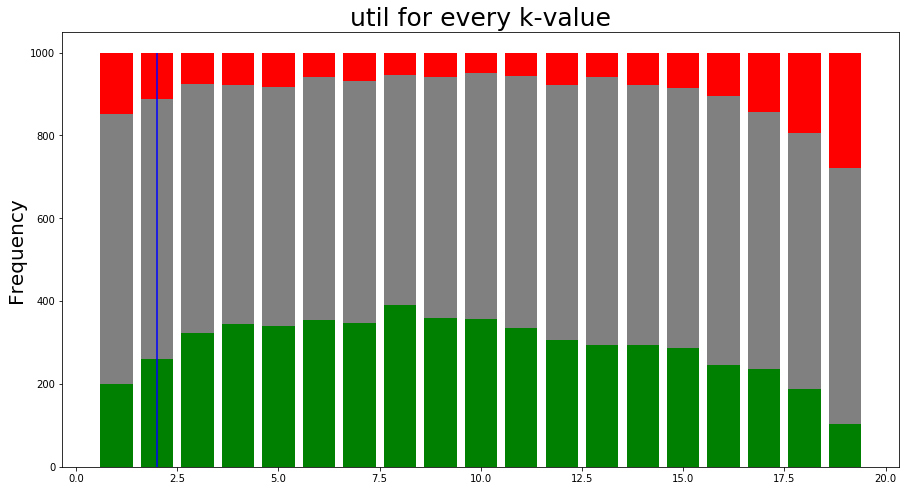

In [358]:
plot_stacked(best, worst, mid, t, P, mean)

In [359]:
t = 'egal'

best, worst, mid = compare_all(t, P)

k_1 => best: 161, worst: 178, mid: 661
k_2 => best: 157, worst: 153, mid: 690
k_3 => best: 193, worst: 141, mid: 666
k_4 => best: 154, worst: 169, mid: 677
k_5 => best: 173, worst: 157, mid: 670
k_6 => best: 185, worst: 150, mid: 665
k_7 => best: 182, worst: 156, mid: 662
k_8 => best: 191, worst: 144, mid: 665
k_9 => best: 191, worst: 135, mid: 674
k_10 => best: 203, worst: 125, mid: 672
k_11 => best: 192, worst: 128, mid: 680
k_12 => best: 193, worst: 133, mid: 674
k_13 => best: 180, worst: 130, mid: 690
k_14 => best: 196, worst: 139, mid: 665
k_15 => best: 188, worst: 132, mid: 680
k_16 => best: 195, worst: 145, mid: 660
k_17 => best: 199, worst: 140, mid: 661
k_18 => best: 207, worst: 142, mid: 651
k_19 => best: 165, worst: 185, mid: 650


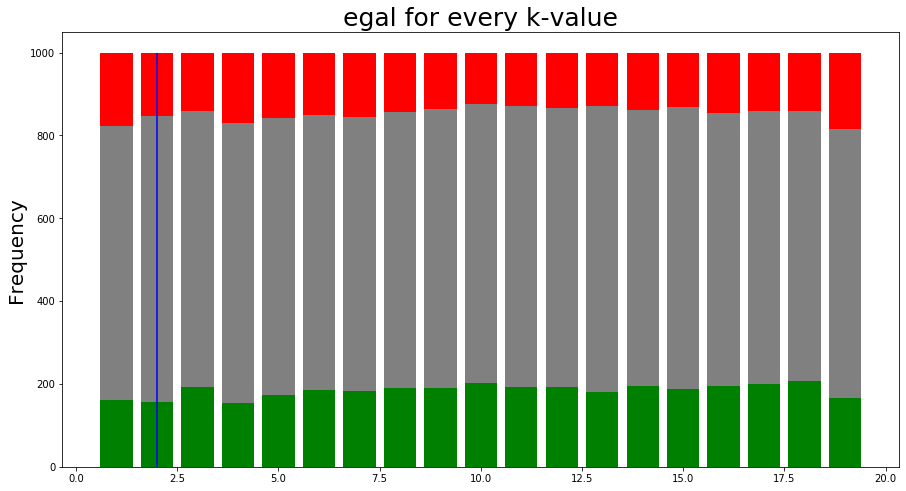

In [360]:
plot_stacked(best, worst, mid, t, P, mean)

k_1 => best: 382, worst: 281, mid: 337
k_2 => best: 435, worst: 237, mid: 328
k_3 => best: 465, worst: 205, mid: 330
k_4 => best: 471, worst: 204, mid: 325
k_5 => best: 462, worst: 197, mid: 341
k_6 => best: 455, worst: 203, mid: 342
k_7 => best: 426, worst: 243, mid: 331
k_8 => best: 409, worst: 256, mid: 335
k_9 => best: 340, worst: 347, mid: 313


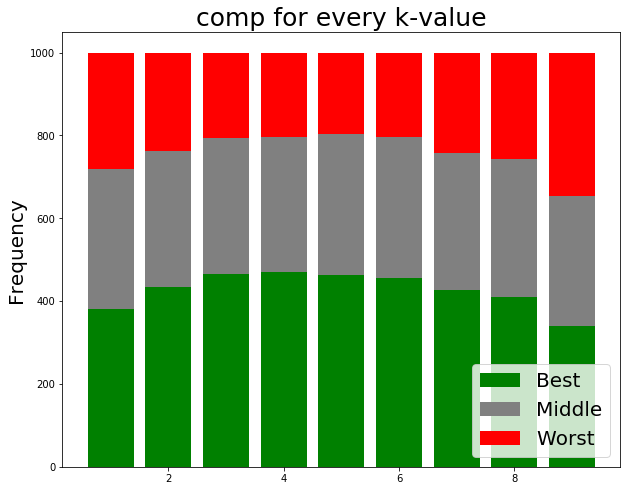

In [220]:
t = 'comp'

best, worst, mid = compare_all(t, P)
plot_stacked(best, worst, mid, t, P)